In [1]:
# Import Dependencies
from sklearn import datasets
from sklearn.model_selection import train_test_split, cross_val_predict
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, plot_confusion_matrix, classification_report
import pandas as pd
import matplotlib.pyplot as plt

## HR Employee Attrition
Keywords: multivariate, classification.

## Description
This dataset is used to evaluae what features lead to employee attrition. This is a fictional data set that was created by IBM data scientists to reflect real world data.

## Source
https://www.kaggle.com/pavansubhasht/ibm-hr-analytics-attrition-dataset

In [4]:
# Read the csv file into a pandas DataFrame
employee_df = pd.read_csv("../Resources/HREmployeeAttrition.csv")
employee_df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,2,1102,2,1,2,1,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,0,1,279,1,8,1,1,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,1,2,1373,1,2,2,4,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,0,1,1392,1,3,4,1,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,0,2,591,1,2,1,3,1,7,...,4,80,1,6,3,3,2,2,2,2


In [6]:
# Select our independent X variables, and our dependent y variable. 
X = df.drop(columns=["Attrition"])
y = df["Attrition"]

In [7]:
# Confirm imblance of target variable 'Attrition'
# 1 = Attrition; 0 = No Attrition
y.value_counts

<bound method IndexOpsMixin.value_counts of 0       1
1       0
2       1
3       0
4       0
       ..
1465    0
1466    0
1467    0
1468    0
1469    0
Name: Attrition, Length: 1470, dtype: int64>

### Imbalanced

In [9]:
# Create Validation training and testing datasets without balancing.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)


In [10]:
# Confirm imblance of target variable 'Attrition' in the test dataset
# 1 = Attrition; 0 = No Attrition
print(y_test.value_counts(normalize=True))

0    0.867347
1    0.132653
Name: Attrition, dtype: float64


In [11]:
# Create a Linear Regression model object
lin_model = LogisticRegression(solver='liblinear')

In [12]:
# Train the model using the training datasets
lin_model.fit(X_train, y_train)

LogisticRegression(solver='liblinear')

In [13]:
# Make predictions using the testing dataset
y_pred = lin_model.predict(X_test)

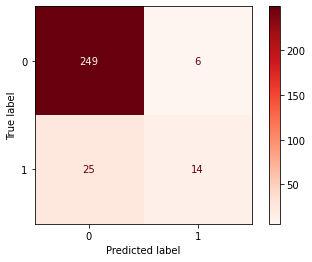

In [15]:
# Plot the Confusion Matrix values
plot_confusion_matrix(lin_model, X_test, y_test, cmap=plt.cm.Reds)

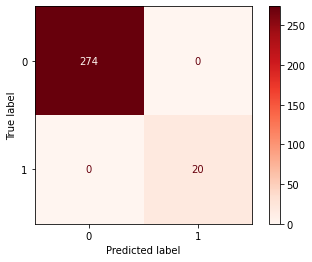

In [16]:
# Plot the Confusion Matrix prediction percentages
plot_confusion_matrix(lin_model, X_test, y_pred, cmap=plt.cm.Reds)

In [17]:
# Print classification report
print(classification_report(y_test, y_pred, target_names=["No Attrition", "Attrition"]))

              precision    recall  f1-score   support

No Attrition       0.91      0.98      0.94       255
   Attrition       0.70      0.36      0.47        39

    accuracy                           0.89       294
   macro avg       0.80      0.67      0.71       294
weighted avg       0.88      0.89      0.88       294



### Balanced

In [ ]:
# Create our Validation training and testing datasets with balancing.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0, stratify=y)


In [18]:
# Confirm imblance of target variable 'Attrition' in our stratified dataset
# 1 = Attrition; 0 = No Attrition

print("Stratified distribution ")
print(y_test.value_counts(normalize=True))

Stratified distribution 
0    0.867347
1    0.132653
Name: Attrition, dtype: float64


In [19]:
# Create the Linear Regression model object
lin_model = LogisticRegression(solver='liblinear')

In [20]:
# Train the model using the training sets
lin_model.fit(X_train, y_train)

LogisticRegression(solver='liblinear')

In [ ]:
# Make predictions using the testing dataset
y_pred = model.predict(X_test)

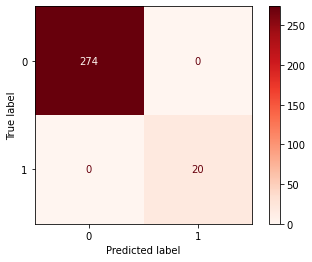

In [22]:
# Plot the Confusion Matrix values
plot_confusion_matrix(lin_model, X_test, y_pred, cmap=plt.cm.Reds)

In [24]:
# Plot the Confusion Matrix prediction percentages
plot_confusion_matrix(lin_model, X_test, y_pred, target_names=['No Attrition', "Attrition"])

SyntaxError: unexpected EOF while parsing (<ipython-input-24-a46f8fb9847a>, line 2)

In [ ]:
# Print classification report
